In [1]:
import sys
sys.path.append('..')
from src import forensic_similarity as forsim #forensic similarity tool
from src.utils.blockimage import tile_image #function to tile image into blocks
from src.graph import ForensicGraph
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Initiate a new forensic similarity graph
fs_graph0 = ForensicGraph(patch_size=256, overlap=0.5, model_weights='../model/cam_256x256/-30')
fs_graph1 = ForensicGraph(patch_size=256, overlap=0.5, model_weights='../model/cam_256x256/-30')
fs_graph2 = ForensicGraph(patch_size=256, overlap=0.5, model_weights='../model/cam_256x256/-30')
fs_graph3 = ForensicGraph(patch_size=256, overlap=0.5, model_weights='../model/cam_256x256/-30')

## 0) Load images

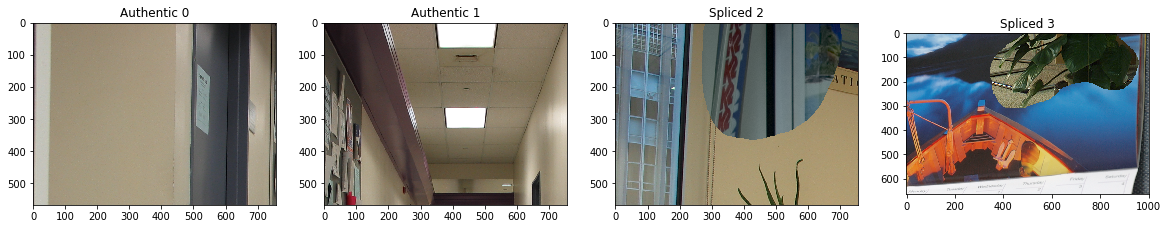

In [3]:
""" 0) Load images """
I0 = plt.imread('examples/canong3_02_sub_01.tif') # authentic
I1 = plt.imread('examples/canong3_02_sub_02.tif') # authentic
I2 = plt.imread('examples/canong3_canonxt_sub_01.tif') # spliced
I3 = plt.imread('examples/nikond70_kodakdcs330_sub_19.tif') # spliced

# show the images
fig,ax = plt.subplots(1,4, figsize=(20,20))
ax[0].imshow(I0); ax[1].imshow(I1); ax[2].imshow(I2); ax[3].imshow(I3)
ax[0].set_title('Authentic 0'); ax[1].set_title('Authentic 1'); ax[2].set_title('Spliced 2'); ax[3].set_title('Spliced 3')
plt.show()

In [4]:
# patches and xy coordinates of each patch for images 0, 1 and 2
T0, xy0 = tile_image(I0, width=fs_graph0.patch_size, height=fs_graph0.patch_size, x_overlap=fs_graph0.overlap,
                     y_overlap=fs_graph0.overlap)
T1, xy1 = tile_image(I1, width=fs_graph1.patch_size, height=fs_graph1.patch_size, x_overlap=fs_graph1.overlap,
                     y_overlap=fs_graph2.overlap)
T2, xy2 = tile_image(I2, width=fs_graph2.patch_size, height=fs_graph2.patch_size, x_overlap=fs_graph2.overlap,
                     y_overlap=fs_graph2.overlap)
T3, xy3 = tile_image(I3, width=fs_graph3.patch_size, height=fs_graph3.patch_size, x_overlap=fs_graph3.overlap,
                     y_overlap=fs_graph3.overlap)


## 1) Sample N patches from the image

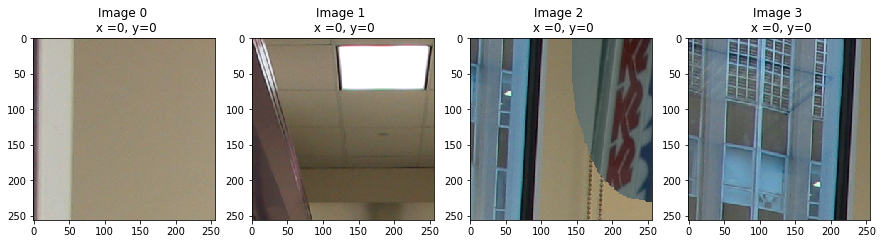

In [5]:
""" 1) Sample N patches from the image """
X0, ind0, X10, ind01 = fs_graph0.dense_tiles(T0, T0)
X1, ind1, X11, ind11 = fs_graph1.dense_tiles(T1, T1)
X2, ind2, X21, ind12 = fs_graph2.dense_tiles(T2, T2)
X3, ind3, X31, ind13 = fs_graph3.dense_tiles(T3, T3)

fig,ax = plt.subplots(1,4, figsize=(15,15)) #show randomly selected tiles
ax[0].imshow(T0[ind0[0]])
ax[1].imshow(T1[ind1[10]])
ax[2].imshow(T2[ind2[29]])
ax[3].imshow(T2[ind3[0]])

ax[0].set_title('Image 0 \n x ={}, y={}'.format(xy0[ind0[0]][0],xy0[ind0[0]][1]))
ax[1].set_title('Image 1 \n x ={}, y={}'.format(xy1[ind1[0]][0],xy1[ind1[0]][1]))
ax[2].set_title('Image 2 \n x ={}, y={}'.format(xy2[ind2[0]][0],xy2[ind2[0]][1]))
ax[3].set_title('Image 3 \n x ={}, y={}'.format(xy3[ind3[0]][0],xy3[ind3[0]][1]))

plt.show()

## 2) Calculate forensic similarity between all pairs od sampled patches

In [6]:
""" 2) Calculate forensic similarity between all pairs od sampled patches """
sim_0 = forsim.calculate_forensic_similarity(X0, X0, fs_graph0.model_weights, fs_graph0.patch_size)  
sim_1 = forsim.calculate_forensic_similarity(X1, X1, fs_graph1.model_weights, fs_graph1.patch_size)  
sim_2 = forsim.calculate_forensic_similarity(X2, X2, fs_graph2.model_weights, fs_graph2.patch_size)  
sim_3 = forsim.calculate_forensic_similarity(X3, X3, fs_graph3.model_weights, fs_graph3.patch_size)  


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../model/cam_256x256/-30


Calculating Forensic Similarity: 100%|██████████| 3/3 [00:19<00:00,  6.56s/it]


INFO:tensorflow:Restoring parameters from ../model/cam_256x256/-30


Calculating Forensic Similarity: 100%|██████████| 3/3 [00:19<00:00,  6.64s/it]


INFO:tensorflow:Restoring parameters from ../model/cam_256x256/-30


Calculating Forensic Similarity: 100%|██████████| 3/3 [00:26<00:00,  8.96s/it]


INFO:tensorflow:Restoring parameters from ../model/cam_256x256/-30


Calculating Forensic Similarity: 100%|██████████| 12/12 [01:26<00:00,  7.22s/it]


## 3) Convert the image into its graph representation

In [7]:
""" 3) Convert the image into its graph representation """
graph0 = fs_graph0.graph
fs_graph0.forensic_similarity_matrix(sim_0, ind0, ind01, threshold=0)


graph1 = fs_graph1.graph
fs_graph1.forensic_similarity_matrix(sim_1, ind1, ind11, threshold=0)

graph2 = fs_graph2.graph
fs_graph2.forensic_similarity_matrix(sim_2, ind2, ind12, threshold=0)

graph3 = fs_graph3.graph
fs_graph3.forensic_similarity_matrix(sim_3, ind3, ind13, threshold=0)

## 4) Perform forgery detection/localization

#### 4 A) spectral clustering

In [8]:
""" 4) Perform forgery detection/localization """
# 4 A) spectral clustering
lambda2_0, u2_0 = fs_graph0.spectral_clustering(10)
print(f'Forged = {lambda2_0}')
print(u2_0)

lambda2_1, u2_1 = fs_graph1.spectral_clustering(10)
print(f'Forged = {lambda2_1}')
print(u2_1)

lambda2_2, u2_2 = fs_graph2.spectral_clustering(10)
print(f'Forged = {lambda2_2}')
print(u2_2)

lambda2_3, u2_3 = fs_graph3.spectral_clustering(10)
print(f'Forged = {lambda2_3}')
print(u2_3)

lambda_2 = 11.99039906263355
Forged = False
[1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0]
lambda_2 = 11.999230623245271
Forged = False
[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1]
lambda_2 = 11.99900740385057
Forged = False
[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0]
lambda_2 = 23.998564064502702
Forged = False
[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1]


In [9]:
fs_graph3.visualize_clusters(graph3, u2_3, out_file="../spectral_graph.png", clean=True)

FileNotFoundError: [Errno 2] No such file or directory: ''

Check the output folder to look at the generated graph.

#### 4 B) modularity optimization

In [ ]:
# 4 B) modularity optimization
q_opt0, modularity_optim0 = fs_graph0.modularity_optimization(2)
print(f'Forged = {q_opt0}')
print(modularity_optim0)

q_opt1, modularity_optim1 = fs_graph1.modularity_optimization(2)
print(f'Forged = {q_opt1}')
print(modularity_optim1)

q_opt2, modularity_optim2 = fs_graph2.modularity_optimization(2)
print(f'Forged = {q_opt2}')
print(modularity_optim2)

q_opt3, modularity_optim3 = fs_graph3.modularity_optimization(2)
print(f'Forged = {q_opt3}')
print(modularity_optim3)

fs_graph3.visualize_clusters(modularity_optim3, modularity_optim3.membership, out_file="modularity_graph.png", clean=True)

Check the output folder to look at the generated graph.